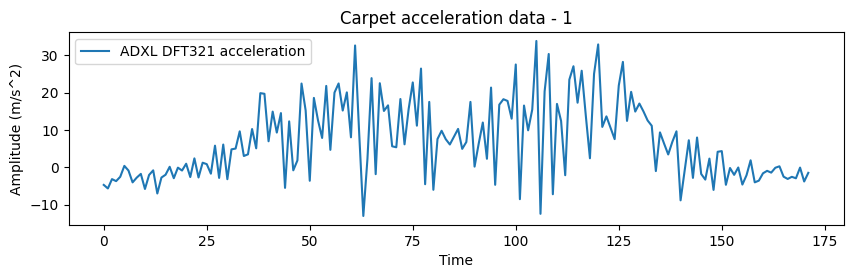

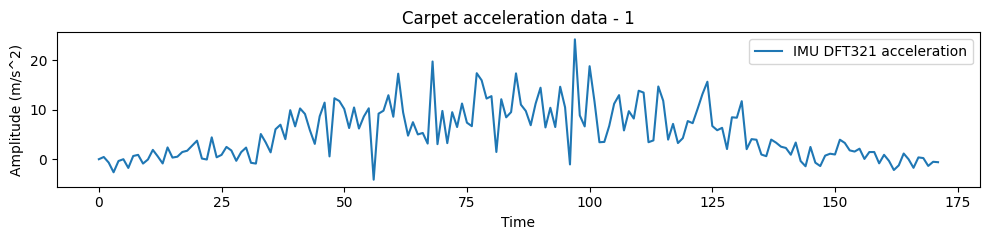

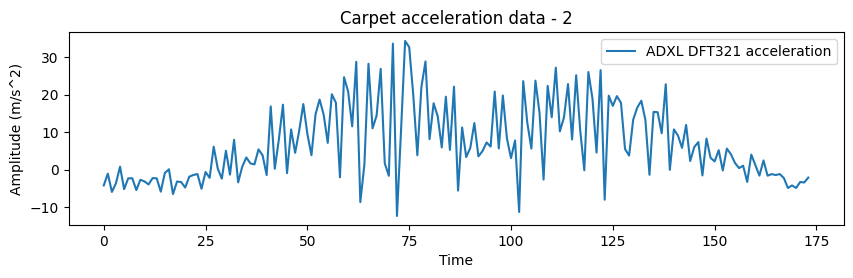

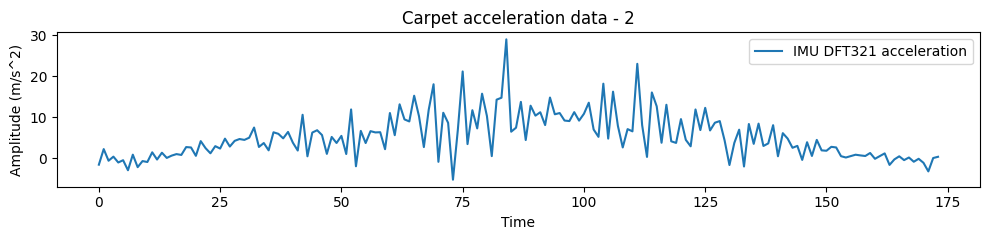

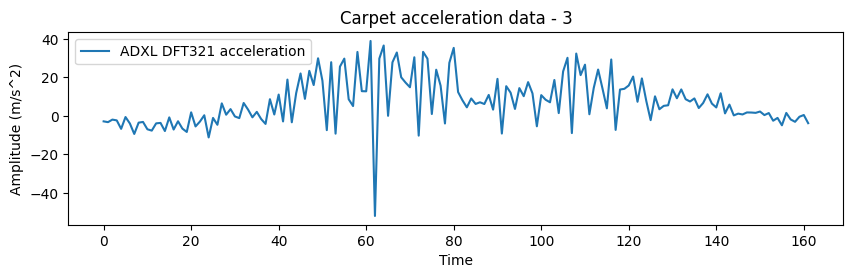

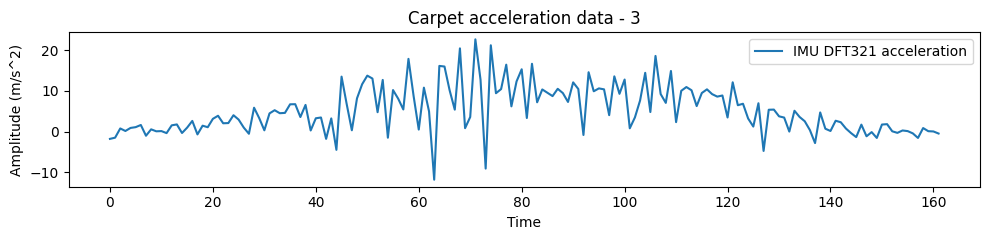

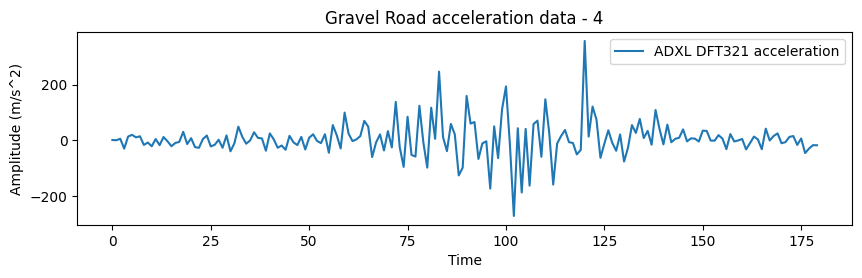

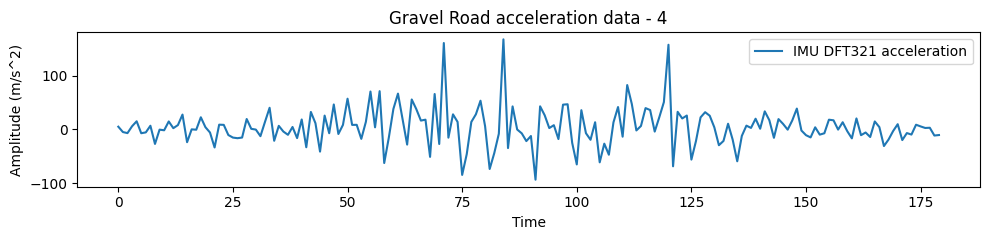

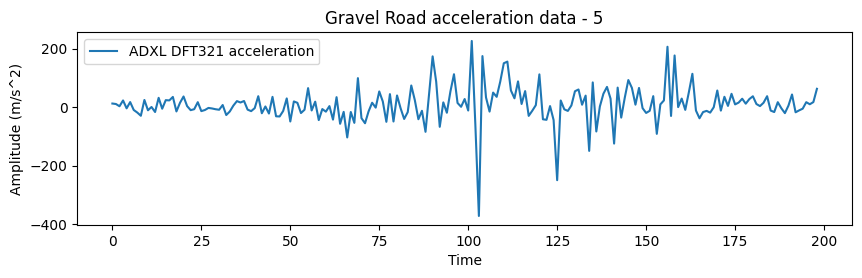

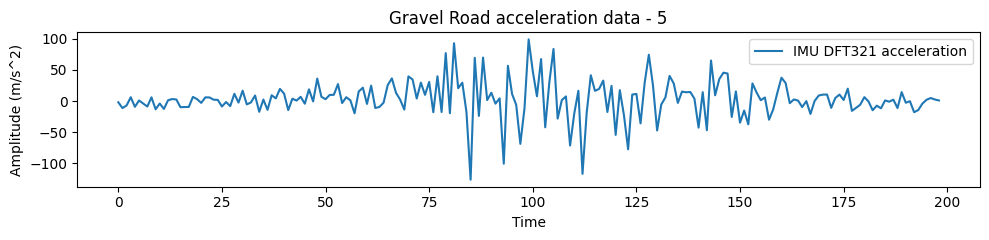

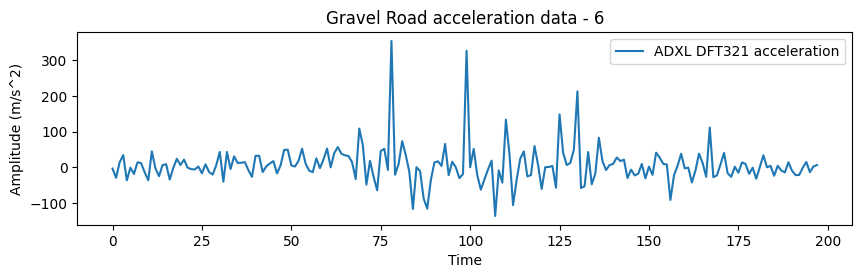

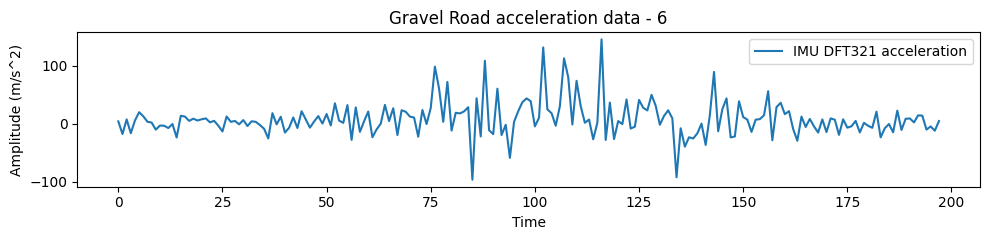

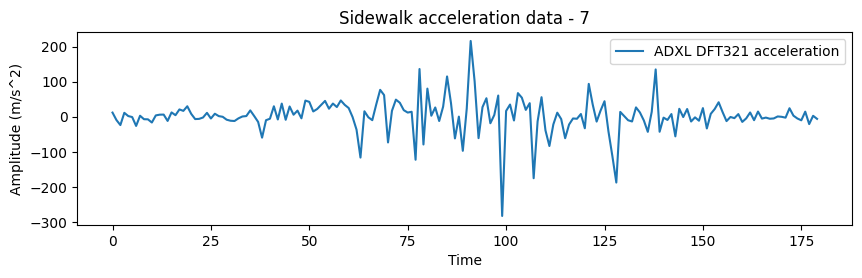

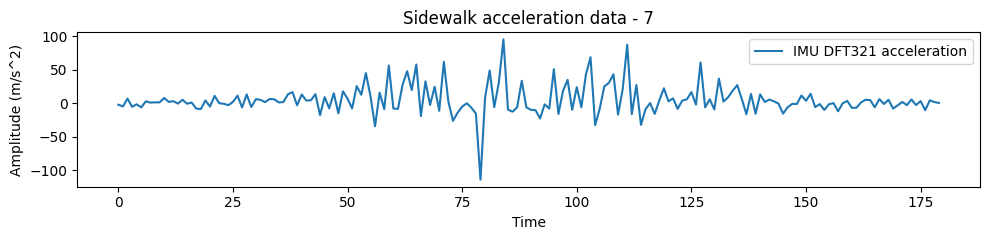

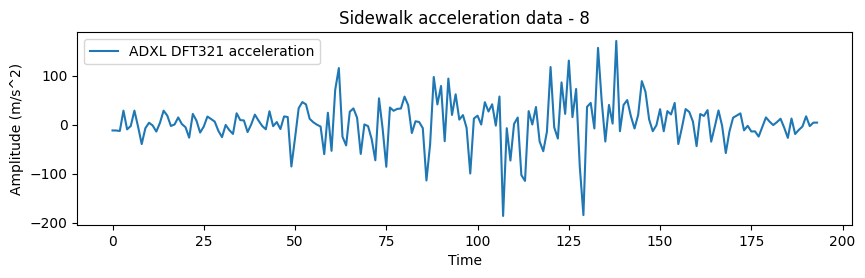

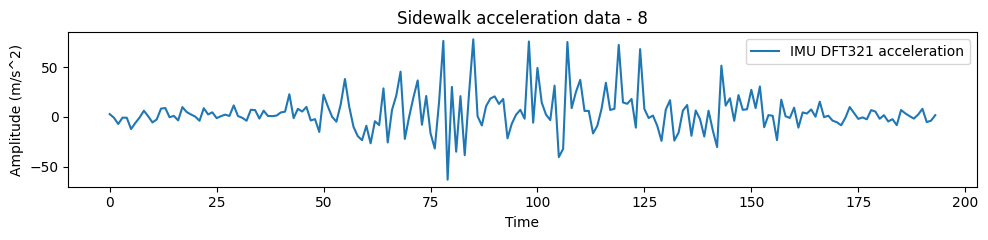

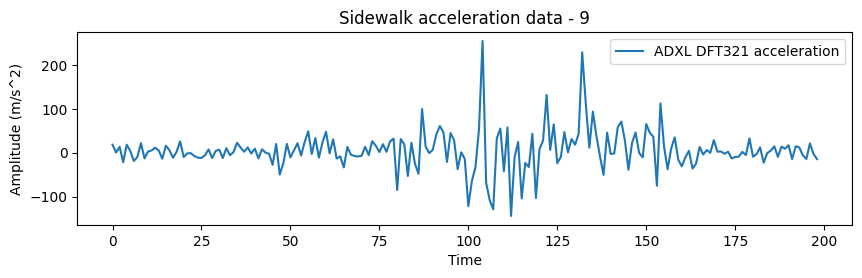

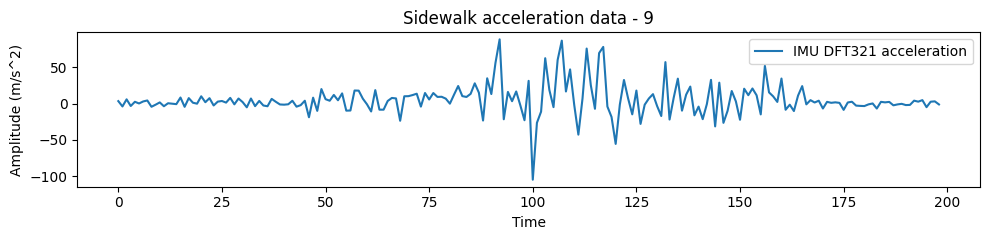

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os as os

def smoothed_dft(acceleration):
    N = len(acceleration)
    window = np.hanning(N)  # Select the Hanning window function
    windowed_acceleration = acceleration * window
    dft = np.fft.fft(windowed_acceleration)
    return dft

def calculate_frequency_domain_magnitude(acceleration_array):
    frequency_domain_magnitude = 0
    for acceleration in acceleration_array:
        dft_magnitude = np.abs(smoothed_dft(acceleration))
        frequency_domain_magnitude += pow(dft_magnitude,2)
    return pow(frequency_domain_magnitude,1/2)

def calculate_average_phase(acceleration_array):
    sum_imaginary_parts = 0
    sum_real_parts = 0
    for acceleration in acceleration_array:
        dft = smoothed_dft(acceleration)
        sum_real_parts += np.real(dft)  # Sum of real parts
        sum_imaginary_parts += np.imag(dft)  # Sum of imaginary parts
    
    average_phase = np.arctan2(sum_imaginary_parts, sum_real_parts)  # Calculate average phase
    return average_phase

def perform_inverse_dft(magnitude, phase):
    complex_signal = magnitude * np.exp(1j * phase)  # Construct complex signal from magnitude and phase
    time_domain_signal = np.fft.ifft(complex_signal)  # Compute inverse DFT to obtain time-domain signal
    return time_domain_signal

def generate_time_domain_signal(acceleration_array):
    frequency_domain_magnitude = calculate_frequency_domain_magnitude(acceleration_array)
    average_phase = calculate_average_phase(acceleration_array)
    time_domain_signal = perform_inverse_dft(frequency_domain_magnitude,average_phase)
    return time_domain_signal

def trimExcelFileName(excel_file_name):
    parts = excel_file_name.split("\\")
    return parts[-1].split('_')[0] 

data_folder_path = 'D:/GEM Lab/GEMLabHCIResearch/Accelerometer and Audio data/IMU and ADXL data/Excel data and plotting program/Excel sheets/'
folder_list = os.listdir(data_folder_path)
chart_cnt=1

for list_item in folder_list:
    item_path = os.path.join(data_folder_path, list_item)
    if os.path.isfile(item_path):
        surface_data = pd.read_excel(item_path,sheet_name=None)
        with pd.ExcelWriter(item_path, engine='openpyxl') as writer:
            for sheet_name,data in surface_data.items():
                samples = data.get('Samples')
                adxl_mag = data.get('ADXL Magnitude')
                imu_mag = data.get('IMU Magnitude')
                
                adxl_x = data.get('ADXL-X').values
                adxl_y = data.get('ADXL-Y').values
                adxl_z = data.get('ADXL-Z').values
                adxl_acceleration_array =  np.array([adxl_x,adxl_y,adxl_z])
                adxl_time_domain_signal = generate_time_domain_signal(adxl_acceleration_array)
                data['ADXL Magnitude'] = np.real(adxl_time_domain_signal)
                
                imu_x = data.get('IMU-X').values
                imu_y = data.get('IMU-Y').values
                imu_z = data.get('IMU-Z').values
                imu_acceleration_array =  np.array([imu_x,imu_y,imu_z])
                imu_time_domain_signal = generate_time_domain_signal(imu_acceleration_array)
                data['IMU Magnitude'] = np.real(imu_time_domain_signal)
                
                data.to_excel(writer, sheet_name=sheet_name, index=False)

                # print(np.real(adxl_time_domain_signal))
                # print(np.real(imu_time_domain_signal))
                
                # Create a figure and axis object
                fig, ax = plt.subplots(figsize=(10,2.5))

                # Plot the line - ADXL recordings
            
                ax.plot(np.real(adxl_time_domain_signal), label ='ADXL DFT321 acceleration')

                # Add labels and title
                ax.set_xlabel('Time')
                ax.set_ylabel('Amplitude (m/s^2)')
                ax.legend()
                ax.set_title(trimExcelFileName(list_item)+' acceleration data - '+str(chart_cnt))
                
                # Create a figure and axis object
                fig1, ax1 = plt.subplots(figsize=(10, 2.5))

                # Plot the line - IMU recordings
                ax1.plot(np.real(imu_time_domain_signal), label ='IMU DFT321 acceleration')

                # Add labels and title
                ax1.set_xlabel('Time')
                ax1.set_ylabel('Amplitude (m/s^2)')
                ax1.legend()
                ax1.set_title(trimExcelFileName(list_item)+' acceleration data - '+str(chart_cnt))
                chart_cnt+=1
                
                fig1.tight_layout()
                # Display the plot
                plt.show() 

